In [1]:
import pandas as pd
import diff_classifier.aws as aws
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import numpy.ma as ma
%matplotlib inline

In [2]:
def plot_ft_distribution(prefix, bins, labels, feature, folder="01_18_Experiment", show=True):
    
    def cumulative(ls):
        test = [0]*len(ls)
        test[0] = np.round(ls[0], 4)
        for i in range(1, len(ls), 1):
            test[i] = np.round(test[i-1] + ls[i], 4)
        return test
    
    def rearrange(*args):
        counter = 0
        for ls in args:
            counter = counter + 1
            old_size = len(ls)
        new_size = counter

        new_lists = np.zeros((old_size, new_size))
        ncounter = 0
        for ls in args:
            for i in range(0, old_size):
                new_lists[i, ncounter] = ls[i]
            ncounter = ncounter + 1
        return new_lists
    
    def generate_legend(bins, ends=True):
        nbins = len(bins)
        lbins = [0]*(nbins-1)
        for i in range(0, nbins-1, 1):
            if i==0 and ends:
                lbins[i] = '< {}'.format(bins[i+1])
            elif i==nbins-2 and ends:
                lbins[nbins-2] = '> {}'.format(bins[i])
            else:
                lbins[i] = '{} -- {}'.format(bins[i], bins[i+1])
        return lbins

    vids = 15
    to_analyze = []
    puppies = []
    hist = [0]*vids
    for vid in range(0, vids):
                pref = "{}_{}".format(prefix, "%04d" % vid)
                pup = prefix.split('_')[0]
                puppies.append(pup)
                fname = 'features_{}.csv'.format(pref)
                to_analyze.append(fname)

                aws.download_s3('{}/{}/{}'.format(folder, pup, fname), fname)
                features = pd.read_csv(to_analyze[vid])
                bins = bins
                
                mfeatures = ma.masked_invalid(features[feature])
                mmask = mfeatures.mask
                mfeatures = features[feature][~mmask]
                hist[vid] = np.histogram(mfeatures, bins=bins)[0]
    
    cortex = [sum(x) for x in zip(hist[0], hist[1], hist[2], hist[3], hist[4])]
    cortex = cumulative(cortex/sum(cortex))
    hipp = [sum(x) for x in zip(hist[5], hist[6], hist[7], hist[8], hist[9])]
    hipp = cumulative(hipp/sum(hipp))
    thal = [sum(x) for x in zip(hist[10], hist[11], hist[12], hist[13], hist[14])]
    thal = cumulative(thal/sum(thal))
    data = rearrange(cortex, hipp, thal)
    
    plt.figure(figsize=(6, 6))

    N = 3
    width = 0.35
    ind = np.arange(N)
    cmap = matplotlib.cm.get_cmap('viridis')
    ssize = data.shape[0]
    legend = list(reversed(generate_legend(bins)))
    ax = {}
    axes = [0]*ssize
    for num in range(0, ssize, 1):
        rgba = cmap((num)*(1.01/(ssize)))
        ax[num] = plt.bar(ind, data[ssize-num-1, :], width, color=rgba)
        axes[num] = ax[num]

    plt.title('{} breakdown'.format(feature))
    plt.xticks(ind, ('cortex', 'hippocampus', 'thalamus'))
    plt.legend(axes, legend, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.subplots_adjust(left=0, bottom=0, right=3, top=1, wspace=0, hspace=0)
    if show:
        plt.show()
    return data

In [3]:
features = pd.read_csv('features_P3_S1_R_0000.csv')

In [26]:
feature = 'boundedness'
to_graph = [features[feature].tolist()]
pos = [1]

In [27]:
len(to_graph)

1

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fee961d99b0>],
 'cmeans': <matplotlib.collections.LineCollection at 0x7fee961d9cc0>}

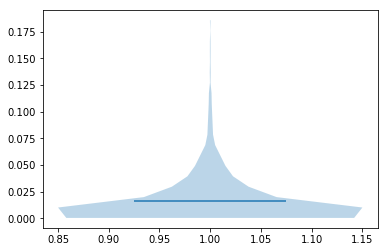

In [29]:
plt.violinplot(to_graph, pos, points=20, widths=0.3, showmeans=True, showextrema=False)
plt.

In [52]:
#cortex
cortexnames = []
puppies = []
cortex = []
folder="01_18_Experiment"
for vid in range(0, 5):
    pref = "{}_{}".format(prefix, "%04d" % vid)
    pup = prefix.split('_')[0]
    puppies.append(pup)
    fname = 'features_{}.csv'.format(pref)
    cortexnames.append(fname)
    
    aws.download_s3('{}/{}/{}'.format(folder, pup, fname), fname, bucket_name='ccurtis.data')
    features = pd.read_csv(cortexnames[vid])
    cortex.extend(features[feature].tolist())
    
#hippocampus
hippnames = []
puppies = []
hipp = []
add = 5
for vid in range(0, 5):
    pref = "{}_{}".format(prefix, "%04d" % int(vid+add))
    pup = prefix.split('_')[0]
    puppies.append(pup)
    fname = 'features_{}.csv'.format(pref)
    hippnames.append(fname)
    
    aws.download_s3('{}/{}/{}'.format(folder, pup, fname), fname, bucket_name='ccurtis.data')
    features = pd.read_csv(hippnames[vid])
    hipp.extend(features[feature].tolist())
    
#thalamus
thalnames = []
puppies = []
thal = []
add = 10
for vid in range(0, 5):
    pref = "{}_{}".format(prefix, "%04d" % int(vid+add))
    pup = prefix.split('_')[0]
    puppies.append(pup)
    fname = 'features_{}.csv'.format(pref)
    thalnames.append(fname)
    
    aws.download_s3('{}/{}/{}'.format(folder, pup, fname), fname, bucket_name='ccurtis.data')
    features = pd.read_csv(thalnames[vid])
    thal.extend(features[feature].tolist())

In [71]:
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

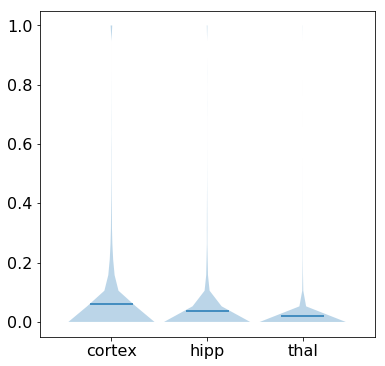

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

to_graph = [cortex, hipp, thal]
pos = [1, 2, 3]
axes.violinplot(to_graph, pos, points=20, widths=0.9, showmeans=True, showextrema=False)

labels = ['cortex', 'hipp', 'thal']
set_axis_style(axes, labels)
axes.tick_params(axis = 'both', which = 'major', labelsize = 16)

In [120]:
def feature_violin(prefix, feature='boundedness', folder="01_18_Experiment", videos=5, labels=['cortex', 'hipp', 'thal'],
                   points=40, ylim=[0, 1], majorticks = np.linspace(0, 1, 11)):
    
    #cortex
    cortexnames = []
    puppies = []
    cortex = []
    for vid in range(0, videos):
        pref = "{}_{}".format(prefix, "%04d" % vid)
        pup = prefix.split('_')[0]
        puppies.append(pup)
        fname = 'features_{}.csv'.format(pref)
        cortexnames.append(fname)

        aws.download_s3('{}/{}/{}'.format(folder, pup, fname), fname, bucket_name='ccurtis.data')
        features = pd.read_csv(cortexnames[vid])
        cortex.extend(features[feature].dropna().tolist())

    #hippocampus
    hippnames = []
    puppies = []
    hipp = []
    add = videos
    for vid in range(0, videos):
        pref = "{}_{}".format(prefix, "%04d" % int(vid+add))
        pup = prefix.split('_')[0]
        puppies.append(pup)
        fname = 'features_{}.csv'.format(pref)
        hippnames.append(fname)

        aws.download_s3('{}/{}/{}'.format(folder, pup, fname), fname, bucket_name='ccurtis.data')
        features = pd.read_csv(hippnames[vid])
        hipp.extend(features[feature].dropna().tolist())

    #thalamus
    thalnames = []
    puppies = []
    thal = []
    add = 2*videos
    for vid in range(0, videos):
        pref = "{}_{}".format(prefix, "%04d" % int(vid+add))
        pup = prefix.split('_')[0]
        puppies.append(pup)
        fname = 'features_{}.csv'.format(pref)
        thalnames.append(fname)

        aws.download_s3('{}/{}/{}'.format(folder, pup, fname), fname, bucket_name='ccurtis.data')
        features = pd.read_csv(thalnames[vid])
        thal.extend(features[feature].dropna().tolist())
        
    def set_axis_style(ax, labels):
        ax.get_xaxis().set_tick_params(direction='out')
        ax.xaxis.set_ticks_position('bottom')
        ax.set_xticks(np.arange(1, len(labels) + 1))
        ax.set_xticklabels(labels)
        ax.set_xlim(0.25, len(labels) + 0.75)
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

    to_graph = [cortex, hipp, thal]
    pos = [1, 2, 3]
    axes.violinplot(to_graph, pos, points=points, widths=0.9, showmeans=True, showextrema=False)
    set_axis_style(axes, labels)
    axes.tick_params(axis = 'both', which = 'major', labelsize = 16)
    axes.set_ylim(ylim)
    axes.set_yticks(majorticks)
    
    plt.show()

In [96]:
features.head()

,Unnamed: 0,AR,D_fit,MSD_ratio,Track_ID,X,Y,alpha,asymmetry1,asymmetry2,asymmetry3,boundedness,efficiency,elongation,fractal_dim,frames,kurtosis,straightness,trappedness
0,0,1.495935,0.752420,0.034725,0.0,1725.768217,400.633886,0.629714,0.383790,0.484709,0.062117,0.016910,0.289305,0.331522,1.998078,126.0,3.592254,0.056493,-0.222078
1,1,1.111547,4.586319,0.000831,1.0,1969.664583,231.554718,0.368423,0.766501,0.257647,0.191415,0.011138,0.762385,0.100353,1.942707,175.0,1.986408,0.075562,-0.223851


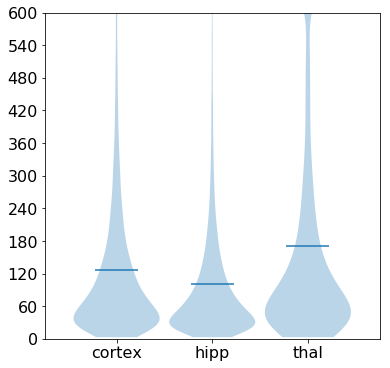

In [150]:
#COOH
feature='frames'
prefix = 'P3_S1_R'
ylim = [0, 600]
majorticks = np.linspace(0, 600, 11)
points = 1000
feature_violin(prefix, feature=feature, points=points, ylim=ylim, majorticks=majorticks)

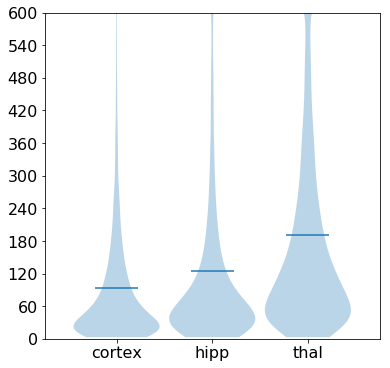

In [151]:
#PEG
prefix = 'P3_S1_L'
feature_violin(prefix, feature=feature, points = points, ylim=ylim, majorticks=majorticks)